In [31]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
import sklearn

## Part 1: Baseline Implementation of the workflow for CIFAR-10 image classification 

### Part 1.1: Data Preparation:

In [2]:
# import data set 
from tensorflow.keras.datasets import cifar10

In [46]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

val_images = train_images[40000:50000]
val_labels = train_labels[40000:50000]

train_images = train_images[0:40000]
train_labels = train_labels[0:40000]
print(train_labels)

[[6]
 [9]
 [9]
 ...
 [6]
 [2]
 [8]]


In [4]:
# 1.1a Find out how many images there are in the training and test set
print('Number of images in the training set:', len(train_images))
print('Number of images in the validation set:', len(val_images))
print('Number of images in the test set: ', len(test_images))


Number of images in the training set: 40000
Number of images in the validation set: 10000
Number of images in the test set:  10000


In [5]:
# 1.1a) Find what type of labeling is used in the data set
print(train_labels[0:20])
print(train_labels.max())
print(train_labels.min())

# CIFAR10 uses labels 0-9 to catagorize the images

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]
 [4]
 [7]
 [7]
 [2]
 [9]
 [9]
 [9]
 [3]
 [2]
 [6]]
9
0


In [6]:
label = str(train_labels[1][0])
print(label)
print(type(label))

9
<class 'str'>


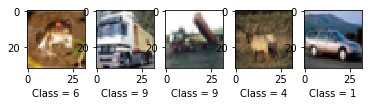

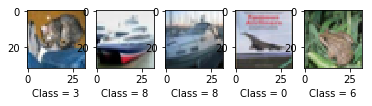

In [7]:
'''
1.1b: Show the first 5 images training set, display them in one row, with the corresponding class
label below each image.

1.1c: Show the first 5 images in the testing set, display them in a second
row, with the corresponding class label below each image. 
'''
# Print a row of the first 5 training images, with class below 
fig1 = plt.figure()
for img in range(0,5):

    a = fig1.add_subplot(1,5,img+1)
    plt.imshow(train_images[img], cmap=plt.cm.binary)
    label = str(train_labels[img][0])
    subtitle = 'Class = ' + label
    a.set(xlabel=subtitle)
 
# Print row of the first 5 test images, with class below 
fig2 = plt.figure()
for img in range(0,5):
    a = fig2.add_subplot(2,5,img+1)
    plt.imshow(test_images[img], cmap=plt.cm.binary)
    label = str(test_labels[img][0])
    subtitle = 'Class = ' + label
    a.set(xlabel=subtitle)   
    


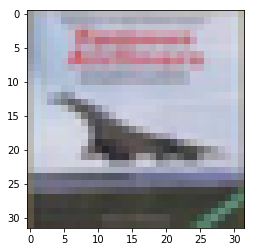

In [8]:
plt.imshow(test_images[3])

In [9]:
print(train_images[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [10]:
'''
1.1d: Normalize all image pixels to the range of 0-1.
'''

# In the last project, we normalized the data by subtracting the mean and dividing by the standard deviation. 
# We do not want to do that here, because that would give us data with values less than 1. 

# Instead, divide by the greatest value, which is 255. 
# The book also converts the data from uitn8 to float32, so we will too
train_images = train_images.astype('float32')/255
val_images = val_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [11]:
print(train_images.max())
print(val_images.max())
print(test_images.max())

1.0
1.0
1.0


In [12]:
'''
This is a multiclass, single-label classification problem
The book says we should use categorical_crossentropy as our loss function, thus we need to make our labels 
1 hot vectors. To do so, import to_categorical. 
'''
from tensorflow.keras.utils import to_categorical

In [13]:
train_labels_cat = to_categorical(train_labels) #### YES WE WANT TO DO THIS????
val_labels_cat = to_categorical(val_labels)
test_labels_cat = to_categorical(test_labels)

In [14]:
print(train_labels_cat[0]) 
print(val_labels_cat[0])
print(test_labels_cat[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [15]:
train_images.shape

(40000, 32, 32, 3)

### 1.2 Model Selection: 

In [16]:
'''
1.2a: Build a CNN model with the following structure:
    i. Three convolutional layers with 16, 32, and 64 3x3 filters
        and Relu activations. Each output feature map should have
        the same dimension as the input to this layer. Each Conv
        layer is followed by a 2x2 Maxpooling layer with stride of 2.
    ii. A Fully Connected layers with 1024 neurons
'''
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2), strides=2))
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2,2), strides=2))
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2,2), strides=2)) ##DO WE REALLY WANT A MAXPOOL AFTER LAST CONV LAYER?????

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [18]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Prepare image, we have to reshape it to feed to network. (It expects batches, so we make it bs=1)
image = test_images[0].reshape(1,32,32,3)
prediction1 = model.predict(image)
print(prediction1)

[[0.08814877 0.09709659 0.10151052 0.11037792 0.10151213 0.09881779
  0.09734613 0.10558481 0.09673523 0.10287011]]


In [21]:
loss1 = keras.losses.categorical_crossentropy(test_labels[0],prediction1)
print('the predicted loss is ', float(loss1))
C = 10
print('the hypothetical loss based on 10 classes is', np.log(C))

the predicted loss is  2.2038450241088867
the hypothetical loss based on 10 classes is 2.302585092994046


### 1.3 Model Training

In [22]:
history = model.fit(train_images, train_labels_cat, batch_size = 100, epochs = 20, validation_data = (val_images, val_labels_cat))

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 4s 92us/sample - loss: 1.6331 - accuracy: 0.4120 - val_loss: 1.3527 - val_accuracy: 0.5242
Epoch 2/20
40000/40000 [==============================] - 3s 73us/sample - loss: 1.2366 - accuracy: 0.5612 - val_loss: 1.1630 - val_accuracy: 0.5935
Epoch 3/20
40000/40000 [==============================] - 3s 73us/sample - loss: 1.0553 - accuracy: 0.6282 - val_loss: 1.0548 - val_accuracy: 0.6361
Epoch 4/20
40000/40000 [==============================] - 3s 73us/sample - loss: 0.9293 - accuracy: 0.6727 - val_loss: 1.0392 - val_accuracy: 0.6430
Epoch 5/20
40000/40000 [==============================] - 3s 74us/sample - loss: 0.8169 - accuracy: 0.7135 - val_loss: 0.9205 - val_accuracy: 0.6852
Epoch 6/20
40000/40000 [==============================] - 3s 74us/sample - loss: 0.7150 - accuracy: 0.7497 - val_loss: 0.9292 - val_accuracy: 0.6849
Epoch 7/20
40000/40000 [==============================] 

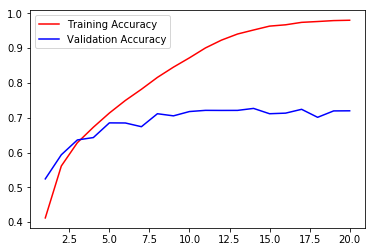

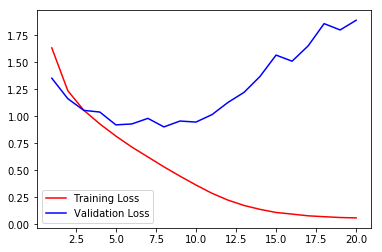

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.legend()

plt.show()

### 1.4 Model Evaluation

In [24]:
(test_loss, test_acc) = model.evaluate(test_images, test_labels_cat)
print('The test loss is', test_loss)
print('The test accuracy is', test_acc)

10000/10000 [==============================] - 1s 109us/sample - loss: 1.9733 - accuracy: 0.7093
The test loss is 1.9733241161346435
The test accuracy is 0.7093


### 1.5 Prediction

In [25]:
image = test_images[0].reshape(1,32,32,3)
prediction2 = model.predict(image)
print(prediction2)

[[3.1578581e-14 1.9085605e-12 1.4726363e-13 1.5036096e-01 1.8942085e-10
  8.4963870e-01 3.1985417e-07 4.9718810e-12 3.9232280e-09 1.3368447e-12]]


In [27]:
loss2 = keras.losses.categorical_crossentropy(test_labels_cat[0],prediction2)
print('the predicted loss after training is', float(loss2))
print('the predicted loss before training was', float(loss1))

the predicted loss after training is 1.8947163820266724
the predicted loss before training was 2.2038450241088867


# Part 2: Additional Functionalities

### 2.1 Accuracy Analysis

In [33]:
test_labels_pred = []
for i in range(10000):
    image = test_images[i].reshape(1,32,32,3)
    pred = model.predict(image)
    smax_pred = tf.nn.log_softmax(pred)
    test_labels_pred.append(np.argmax(smax_pred))

TypeError: confusion_matrix() got an unexpected keyword argument 'normalize'

In [58]:
sklearn.metrics.confusion_matrix(test_labels[:,0], test_labels_pred)

array([[798,  10,  34,  18,  19,   7,  12,   6,  69,  27],
       [ 36, 796,   3,  12,   5,   4,  14,   3,  42,  85],
       [ 79,   5, 522,  83, 104,  92,  67,  27,  15,   6],
       [ 29,  13,  34, 532,  62, 187,  76,  26,  17,  24],
       [ 28,   4,  47,  56, 690,  68,  52,  47,   6,   2],
       [ 20,   5,  24, 179,  48, 647,  32,  34,   8,   3],
       [  5,   6,  22,  63,  47,  34, 813,   2,   4,   4],
       [ 18,   3,  15,  54,  65, 104,  12, 718,   5,   6],
       [ 81,  14,   9,  25,   4,  11,   8,   3, 825,  20],
       [ 64,  76,   8,  14,   3,  20,  14,  17,  32, 752]])